## Project 4: Toyota Corolla

Objective - To prepare a model for better Profit predictions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
data=pd.read_csv('D:/Data Science/TOPMENTOR-DS/Machine Learning/Project_3&4_Multiple_Reg/ToyotaCorolla.csv',encoding='latin1')
data.head()


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
df=data.copy()
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [6]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [7]:
# drop unwanted/unnecessary columns
df1=df.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1', 'Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backset_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'], axis=1, inplace =True)
## we need only these columns: "Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"
df1.head(2)

KeyError: "['Backset_Divider'] not found in axis"

In [8]:
# to check the null values
df.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

There are no null values in the data.

### Exploratory Data Analysis (EDA)

In [9]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [10]:
## Renaming the columns
df.rename(columns={'cc':'CC','Age_08_04':'Age'},inplace=True)  

In [11]:
df.head(2)

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


Text(0.5, 1.0, 'Age wise Price')

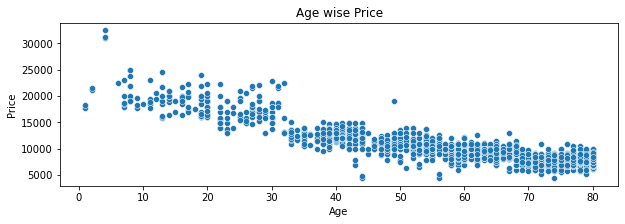

In [202]:
## variation of price with the Age (in months)
plt.figure(figsize=(10,3))
sns.scatterplot(x='Age',y='Price',data=df)
plt.savefig('Age wise Price.jpg',bbox_inches='tight',dpi=200)
plt.title('Age wise Price')

The price of the car decreases with the increase in Age of car. 

Text(0.5, 1.0, 'KM wise Price')

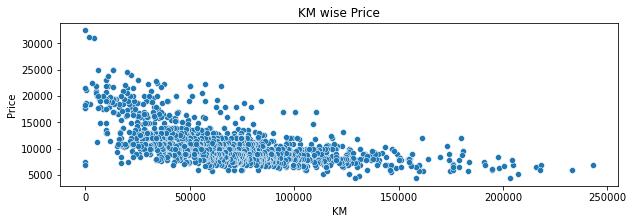

In [203]:
## variation of price with the Kilometers Travelled
plt.figure(figsize=(10,3))
sns.scatterplot(x='KM',y='Price',data=df)
plt.savefig('KM wise Price.jpg',bbox_inches='tight',dpi=200)
plt.title('KM wise Price')

With the increase in the kilometers travelled by car, the car's price keep on reducing. 

Text(0.5, 1.0, 'CC wise Price')

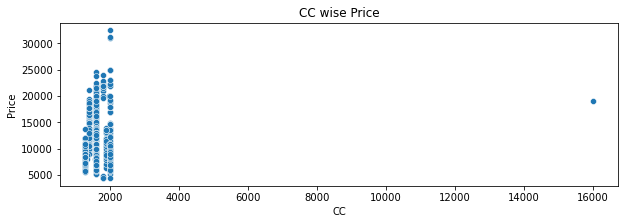

In [206]:
## variation of price with the CC
plt.figure(figsize=(10,3))
sns.scatterplot(x='CC',y='Price',data=df)
plt.savefig('CC wise Price.jpg',bbox_inches='tight',dpi=200)
plt.title('CC wise Price')

1. It does not give any relatable information, that CC and Price not correlated.
2. Also, this data might have outliers 

Text(0.5, 1.0, 'Weight wise Price')

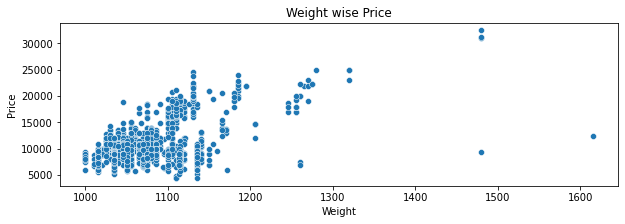

In [207]:
## variation of price with the Weight
plt.figure(figsize=(10,3))
sns.scatterplot(x='Weight',y='Price',data=df)
plt.savefig('Weight wise Price.jpg',bbox_inches='tight',dpi=200)
plt.title('Weight wise Price')

1. It does not give any relatable information, that means Weight and Price not that much correlated.
2. Also, this data might have outliers 

Text(0.5, 1.0, 'Quarterly_Tax wise Price')

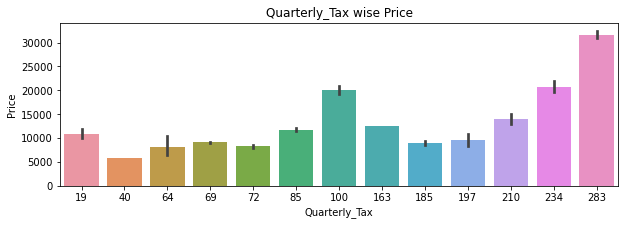

In [210]:
## variation of price with the Quarterly_Tax
plt.figure(figsize=(10,3))
sns.barplot(x='Quarterly_Tax',y='Price',data=df)
plt.savefig('Quarterly_Tax wise Price.jpg',bbox_inches='tight',dpi=200)
plt.title('Quarterly_Tax wise Price')

1. Overall the  Quarterly_Tax keeps on increasing with Price of the Car.
2. It is highest for the most expensive car.

Text(0.5, 1.0, 'Doors wise Price')

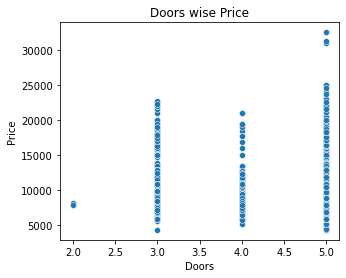

In [18]:
# Doors wise car pricing
plt.figure(figsize=(5,4))
sns.scatterplot(x='Doors',y='Price',data=df)
plt.savefig('Doors wise Price.jpg',bbox_inches='tight',dpi=200)
plt.title('Doors wise Price')

1. Toyota Corolla car comes under all price range with same set of doors. 
2. Although, the most expensive car falls in the category of five doors.
 

Text(0.5, 1.0, 'Gears wise Pric')

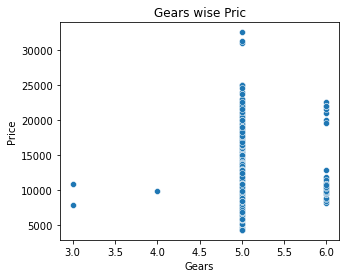

In [20]:
# Gears wise car pricing
plt.figure(figsize=(5,4))
sns.scatterplot(x='Gears',y='Price',data=df)
plt.savefig('Gears wise Price.jpg',bbox_inches='tight',dpi=200)
plt.title('Gears wise Pric')

1. Toyota Corolla car comes under all price range in case of 5 and 6 gears.
2. variations in car price are maximum in case of 5 gears.
3. The expensive car falls in the category of 5 gears.

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


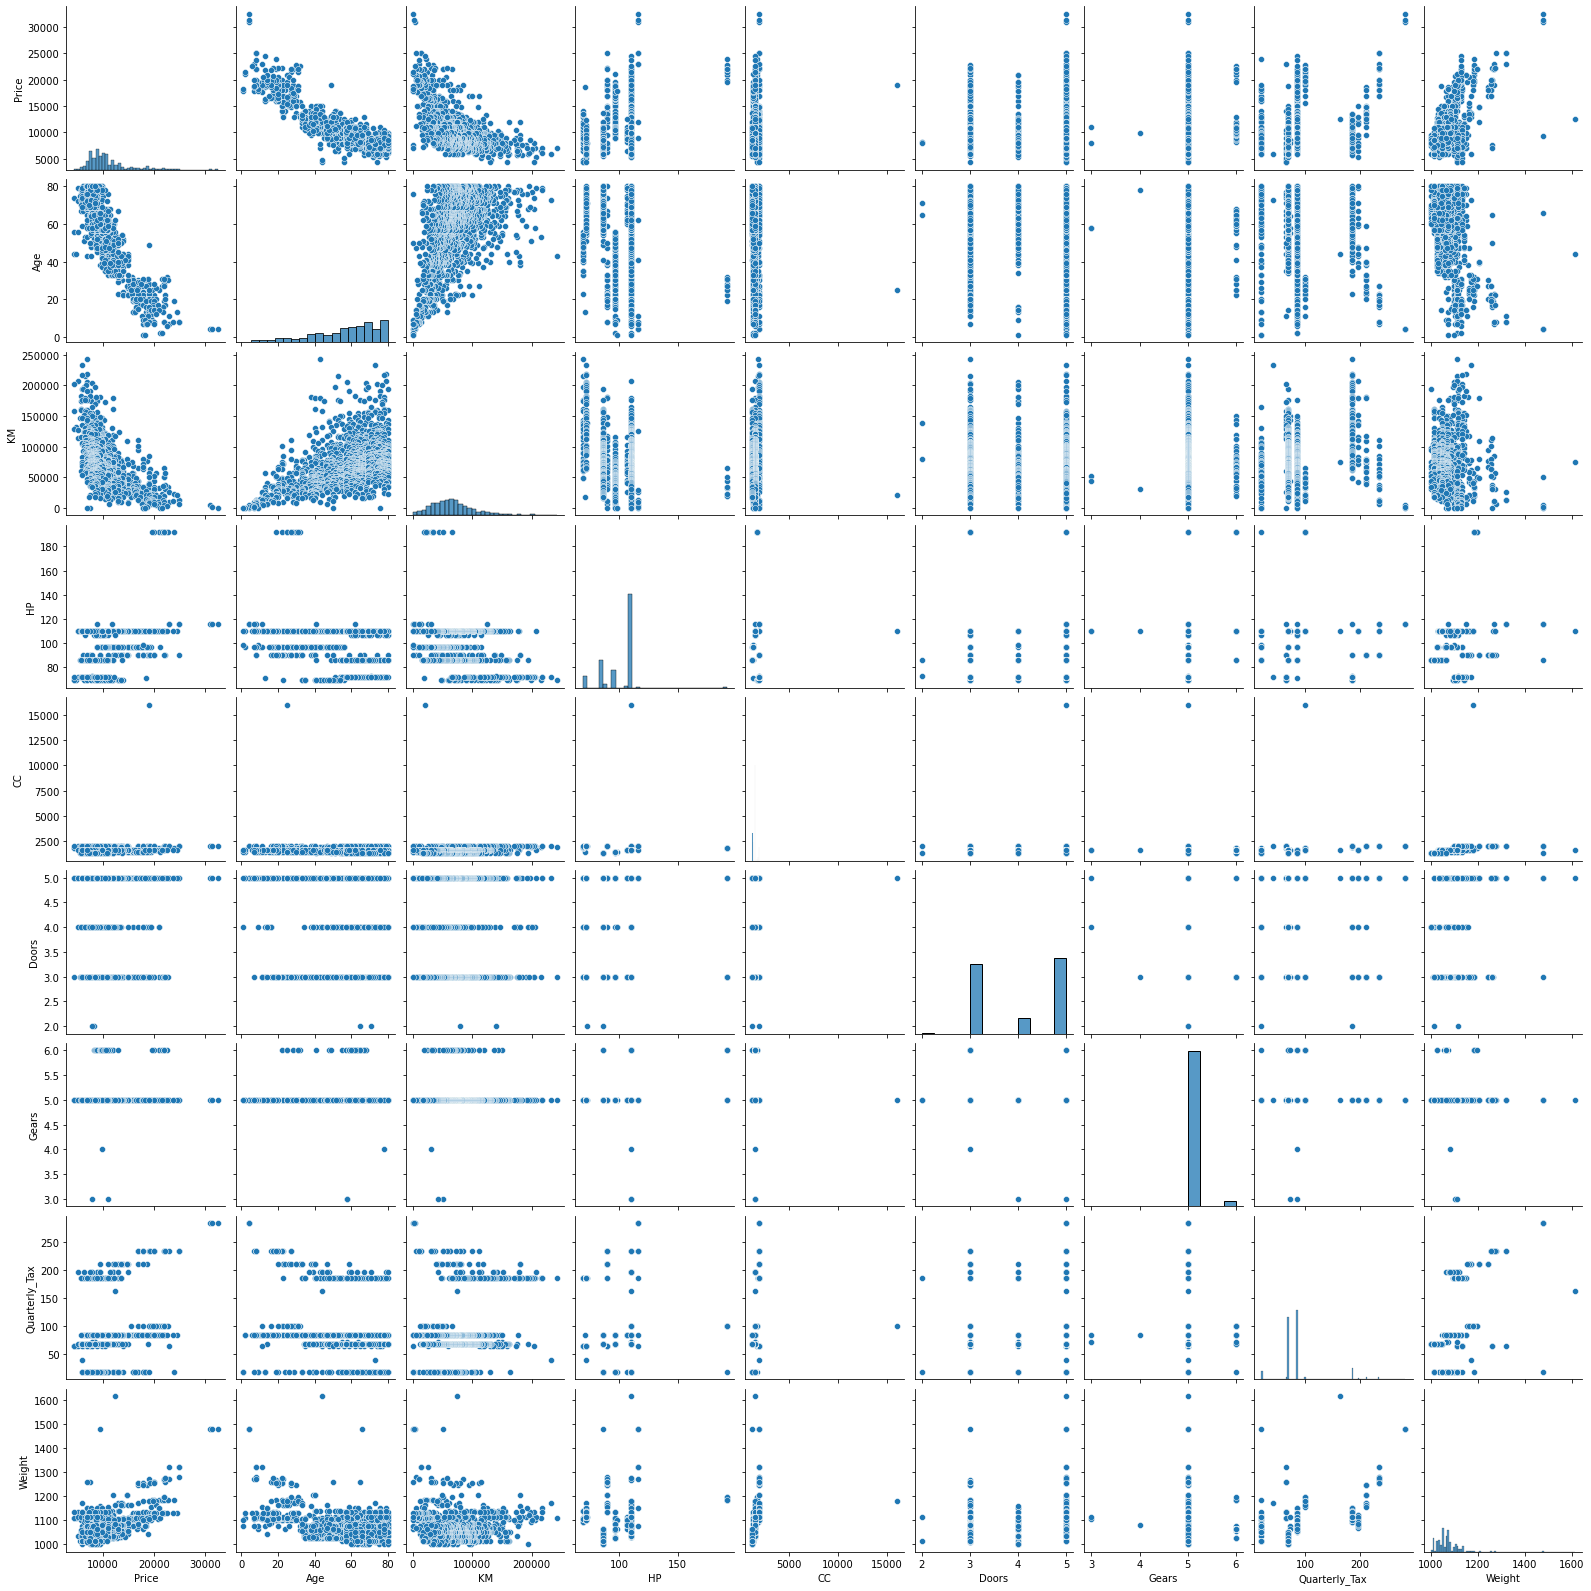

In [66]:
# correlation between them
sns.pairplot(df)
df.corr()

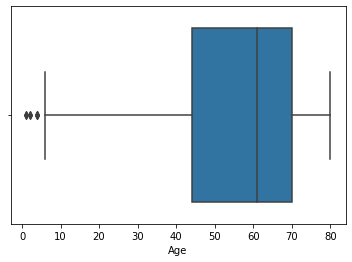

In [21]:
## Box plot of Age data---------to check the presence of outliers
sns.boxplot(x=df['Age'])
plt.savefig('Box plot Age.jpg')

Outliers are present in Age data and are on left side.

In [23]:
## Adjust/Remove the Outlier present in Age coloumn
Q1 = df['Age'].quantile(0.25)
print('The value of Q1 is: ', Q1)
Q3 = df['Age'].quantile(0.75)
print('The value of Q3 is: ', Q3)

The value of Q1 is:  44.0
The value of Q3 is:  70.0


In [24]:
IQR=Q3-Q1
print('The value of IQR is: ', IQR)
lower_thres = Q1 - (1.5*IQR)
print('The value of lower threshld is :',round(lower_thres,2))

The value of IQR is:  26.0
The value of lower threshld is : 5.0


In [25]:
df[df['Age']<lower_thres]

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
109,111,TOYOTA Corolla VERSO 2.0 D4D SOL (7) BNS MPV,32500,4,5,2004,1,Diesel,116,0,...,1,1,1,0,1,1,1,0,0,0
110,112,TOYOTA Corolla VERSO 2.0 D4D SOL (7) MPV,31000,4,5,2004,4000,Diesel,116,1,...,1,1,1,0,1,1,1,1,0,0
111,113,TOYOTA Corolla VERSO 2.0 D4D SOL (7) MPV,31275,4,5,2004,1500,Diesel,116,1,...,1,1,1,0,1,1,1,0,0,0
182,184,TOYOTA Corolla 1.4 16V 5DR TERRA 4/5-Doors,21125,2,7,2004,225,Petrol,97,1,...,1,1,1,0,0,1,1,1,0,0
183,185,TOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-Doors,21500,2,7,2004,15,Petrol,110,1,...,1,1,1,0,1,1,1,0,0,0
184,186,TOYOTA Corolla 1.4-16v VVT-i Linea Terra Comf...,17795,1,8,2004,1,Petrol,98,1,...,1,1,1,0,0,0,0,0,0,0
185,187,TOYOTA Corolla 1.6-16v VVT-i Linea Terra Comfo...,18245,1,8,2004,1,Petrol,110,1,...,1,1,1,0,0,0,0,0,0,0


In [26]:
## Will Change the row in order to avoid outlier
df['Age'] = np.where(df['Age']<lower_thres,lower_thres,df['Age']) 

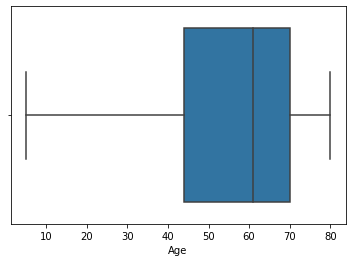

In [27]:
## Box plot of Age data---------after avoiding outlier
sns.boxplot(x=df['Age'])
plt.savefig('Box plot new Age.jpg')

Outliers have been removed from the Age data

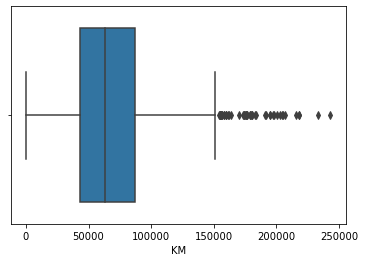

In [28]:
## Box plot of KM data---------to check the presence of outliers
sns.boxplot(x=df['KM'])
plt.savefig('Box plot KM.jpg')

Outliers are present on the right side of the KM data.

In [29]:
## Adjust/Remove the Outlier present in Age coloumn
Q1 = df['KM'].quantile(0.25)
print('The value of Q1 is: ', Q1)
Q3 = df['KM'].quantile(0.75)
print('The value of Q3 is: ', Q3)

The value of Q1 is:  43000.0
The value of Q3 is:  87020.75


In [30]:
IQR=Q3-Q1
print('The value of IQR is: ', IQR)
upper_thres = Q1 + (1.5*IQR)
print('The value of upper threshld is :',round(upper_thres,2))

The value of IQR is:  44020.75
The value of upper threshld is : 109031.12


In [31]:
df[df['KM']>upper_thres]

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
43,44,TOYOTA Corolla 2.0 D4D 90 5DR TERRA COMFORT 4/...,16950,27.0,6,2002,110404,Diesel,90,0,...,1,1,1,0,0,1,1,0,0,0
186,188,TOYOTA Corolla 1.9 D HATCHB SOL 2/3-Doors,6950,43.0,2,2001,243000,Diesel,69,0,...,1,1,1,1,1,0,1,1,1,0
187,189,TOYOTA Corolla 2.0 D4D SEDAN SOL 4/5-Doors,9500,38.0,7,2001,180638,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
188,190,TOYOTA Corolla 2.0 D4D LIFTB SOL 4/5-Doors,11950,40.0,5,2001,179860,Diesel,90,1,...,1,1,1,0,1,0,1,0,0,0
189,191,TOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-...,7750,43.0,2,2001,178858,CNG,110,0,...,0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,1130,TOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-D...,7250,80.0,1,1998,110887,Petrol,110,1,...,1,1,1,0,1,0,1,0,0,0
1125,1131,TOYOTA Corolla 1.3 16V HATCHB S 2/3-Doors,6500,72.0,9,1998,110634,Petrol,86,1,...,1,1,1,0,0,1,1,1,0,0
1126,1132,TOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-D...,6800,80.0,1,1998,110000,Petrol,110,1,...,1,1,1,1,0,0,0,0,1,1
1127,1133,TOYOTA Corolla 1.6 16V WAGON LINEA TERRA Stati...,8700,75.0,6,1998,109540,Petrol,110,0,...,1,1,1,0,0,1,1,0,0,0


In [32]:
## Will Change the row in order to avoid outlier
df['KM'] = np.where(df['KM']>upper_thres,upper_thres,df['KM']) 

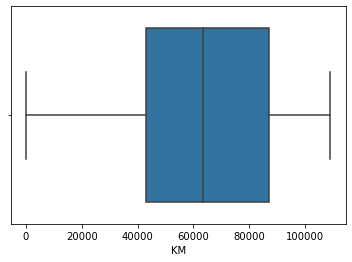

In [33]:
## Box plot of KM data---------after removing outliers
sns.boxplot(x=df['KM'])
plt.savefig('Box plot new KM.jpg')

Outliers have been removed from the KM data

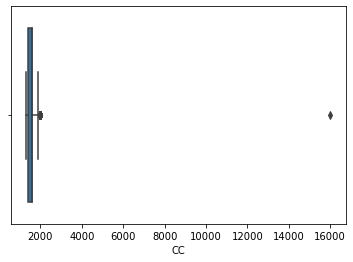

In [34]:
## Box plot of CC data---------to check the presence of outliers
sns.boxplot(x=df['CC'])
plt.savefig('Box plot CC.jpg')

In [35]:
## Adjust/Remove the Outlier present in CC coloumn
Q1 = df['CC'].quantile(0.25)
print('The value of Q1 is: ', Q1)
Q3 = df['CC'].quantile(0.75)
print('The value of Q3 is: ', Q3)

The value of Q1 is:  1400.0
The value of Q3 is:  1600.0


In [36]:
IQR=Q3-Q1
print('The value of IQR is: ', IQR)
upper_thres = Q1 + (1.5*IQR)
print('The value of upper threshld is :',round(upper_thres,2))

The value of IQR is:  200.0
The value of upper threshld is : 1700.0


In [37]:
df[df['CC']>upper_thres]

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23.0,10,2002,46986.0,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23.0,10,2002,72937.0,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24.0,9,2002,41711.0,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26.0,7,2002,48000.0,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30.0,3,2002,38500.0,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1202,TOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-...,8750,74.0,7,1998,89800.0,Diesel,72,1,...,0,0,1,1,0,0,1,0,1,0
1202,1209,TOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-...,6950,73.0,8,1998,88186.0,Diesel,72,1,...,0,0,1,0,0,0,1,0,0,0
1216,1223,TOYOTA Corolla 2.0 DSL LIFTB LINEA TERRA 4/5-D...,8500,70.0,11,1998,85864.0,Diesel,72,1,...,1,1,1,0,0,1,1,0,0,1
1320,1327,TOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-...,9400,69.0,12,1998,67092.0,Diesel,72,1,...,1,1,1,0,0,1,1,0,0,0


In [38]:
## Will Change the row in order to avoid outlier
df['CC'] = np.where(df['CC']>upper_thres,upper_thres,df['CC']) 

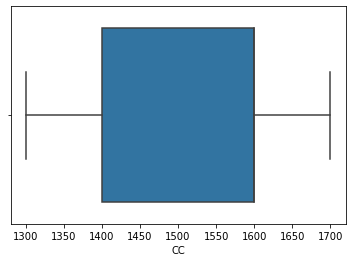

In [39]:
## Box plot of CC data---------After correcting Outliers 
sns.boxplot(x=df['CC'])
plt.savefig('Box plot new CC.jpg')

Outliers have been removed from the CC data

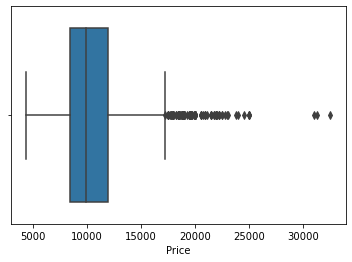

In [40]:
## Box plot of Price data---------to check the presence of outliers
sns.boxplot(x=df['Price'])
plt.savefig('Box plot Price.jpg')

In [41]:
## Adjust/Remove the Outlier present in CC coloumn
Q1 = df['Price'].quantile(0.25)
print('The value of Q1 is: ', Q1)
Q3 = df['Price'].quantile(0.75)
print('The value of Q3 is: ', Q3)

The value of Q1 is:  8450.0
The value of Q3 is:  11950.0


In [42]:
IQR=Q3-Q1
print('The value of IQR is: ', IQR)
upper_thres = Q1 + (1.5*IQR)
print('The value of upper threshld is :',round(upper_thres,2))

The value of IQR is:  3500.0
The value of upper threshld is : 13700.0


In [43]:
df[df['Price']>upper_thres]

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23.0,10,2002,72937.0,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24.0,9,2002,41711.0,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26.0,7,2002,48000.0,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30.0,3,2002,38500.0,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
6,7,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27.0,6,2002,94612.0,Diesel,90,1,...,1,1,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,471,TOYOTA Corolla 1.6 16V VVT I WAGON TERRA Stat...,13950,52.0,5,2000,66527.0,Petrol,110,1,...,1,1,1,0,1,0,1,0,0,1
512,515,TOYOTA Corolla 1.6 16V VVT I WAGON TERRA Stat...,13950,51.0,6,2000,53268.0,Petrol,110,1,...,0,1,1,0,0,0,1,0,0,0
523,526,TOYOTA Corolla 1.6 HB LINEA TERRA 2/3-Doors,18950,49.0,8,2000,49568.0,Petrol,110,1,...,0,0,1,1,1,0,0,0,1,0
529,532,TOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-Doors,13750,54.0,3,2000,48370.0,Petrol,110,1,...,1,1,1,0,1,0,1,0,0,1


In [44]:
## Will Change the row in order to avoid outlier
df['Price'] = np.where(df['Price']>upper_thres,upper_thres,df['Price']) 

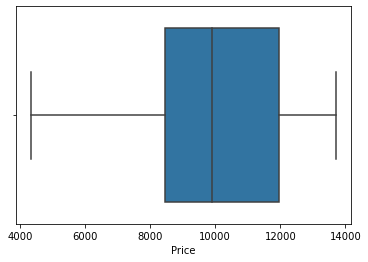

In [45]:
## Box plot of CC data---------After correcting Outliers 
sns.boxplot(x=df['Price'])
plt.savefig('Box plot new Price.jpg')

Outliers have been removed from the Price data

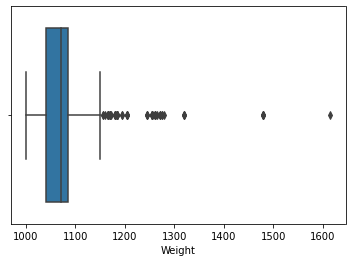

In [46]:
## Box plot of weight data---------to check the presence of outliers
sns.boxplot(x=df['Weight'])
plt.savefig('Box plot Weight.jpg')

In [47]:
## Adjust/Remove the Outlier present in CC coloumn
Q1 = df['Weight'].quantile(0.25)
print('The value of Q1 is: ', Q1)
Q3 = df['Weight'].quantile(0.75)
print('The value of Q3 is: ', Q3)

The value of Q1 is:  1040.0
The value of Q3 is:  1085.0


In [48]:
IQR=Q3-Q1
print('The value of IQR is: ', IQR)
upper_thres = Q1 + (1.5*IQR)
print('The value of upper threshld is :',round(upper_thres,2))

The value of IQR is:  45.0
The value of upper threshld is : 1107.5


In [49]:
df[df['Weight']>upper_thres]

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500.0,23.0,10,2002,46986.0,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13700.0,23.0,10,2002,72937.0,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13700.0,24.0,9,2002,41711.0,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13700.0,26.0,7,2002,48000.0,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13700.0,30.0,3,2002,38500.0,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,1337,TOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-...,8950.0,71.0,10,1998,65021.0,Diesel,72,1,...,0,0,1,0,0,0,1,0,0,1
1353,1360,TOYOTA Corolla 1.6 LB LINEA LUNA 4/5-Doors,8250.0,80.0,1,1998,60476.0,Petrol,110,1,...,1,1,1,0,1,0,0,0,0,0
1387,1394,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,7450.0,78.0,3,1998,52287.0,Petrol,110,0,...,1,1,1,0,0,0,0,0,0,0
1416,1423,TOYOTA Corolla 1.6 LB 4/5-Doors,8950.0,79.0,2,1998,40093.0,Petrol,110,0,...,1,0,1,1,0,0,0,0,1,0


In [50]:
## Will Change the row in order to avoid outlier
df['Weight'] = np.where(df['Weight']>upper_thres,upper_thres,df['Weight']) 

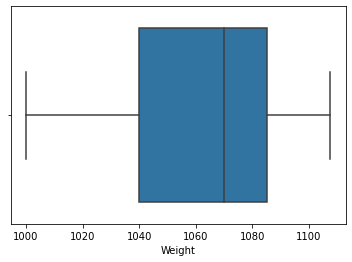

In [51]:
## Box plot of Weight data---------After correcting Outliers 
sns.boxplot(x=df['Weight'])
plt.savefig('Box plot new Weight.jpg')

Outliers have been removed from the Weight data

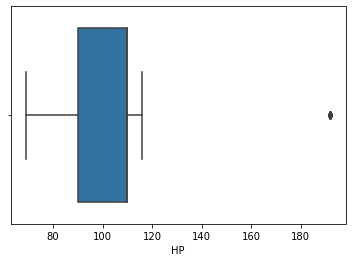

In [53]:
## Box plot of HP--------to check the presence of outliers
sns.boxplot(x=df['HP'])
plt.savefig('Box plot HP.jpg')

In [54]:
## Adjust/Remove the Outlier present in HP coloumn
Q1 = df['HP'].quantile(0.25)
print('The value of Q1 is: ', Q1)
Q3 = df['HP'].quantile(0.75)
print('The value of Q3 is: ', Q3)

The value of Q1 is:  90.0
The value of Q3 is:  110.0


In [55]:
IQR=Q3-Q1
print('The value of IQR is: ', IQR)
upper_thres = Q1 + (1.5*IQR)
print('The value of upper threshld is :',round(upper_thres,2))

The value of IQR is:  20.0
The value of upper threshld is : 120.0


In [56]:
df[df['HP']>upper_thres]

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
8,9,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,13700.0,27.0,6,2002,19700.0,Petrol,192,0,...,1,1,1,1,0,0,0,1,1,0
10,11,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors,13700.0,25.0,8,2002,31461.0,Petrol,192,0,...,1,1,1,0,0,0,0,1,0,0
11,12,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT BNS 2...,13700.0,22.0,11,2002,43610.0,Petrol,192,0,...,1,1,1,0,1,1,1,1,0,0
12,13,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,13700.0,25.0,8,2002,32189.0,Petrol,192,0,...,1,1,1,0,1,1,1,1,0,0
13,14,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,13700.0,31.0,2,2002,23000.0,Petrol,192,1,...,1,1,1,0,1,1,1,1,0,0
14,15,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,13700.0,32.0,1,2002,34131.0,Petrol,192,1,...,1,1,1,0,1,1,1,1,0,0
15,16,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,13700.0,28.0,5,2002,18739.0,Petrol,192,0,...,1,1,1,0,1,1,1,1,0,0
16,17,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-...,13700.0,30.0,3,2002,34000.0,Petrol,192,1,...,1,1,1,0,1,0,1,1,0,0
49,50,TOYOTA Corolla 1.8 16V VVTLI 5DR T SPORT 4/5-D...,13700.0,31.0,2,2002,64982.0,Petrol,192,1,...,1,1,1,0,1,1,1,1,0,0
53,54,TOYOTA Corolla 1.8 VVTL-i T-Sport 4/5-Doors,13700.0,27.0,6,2002,49866.0,Petrol,192,1,...,1,1,1,1,0,0,0,1,1,0


In [58]:
## Will Change the row in order to avoid outlier
df['HP'] = np.where(df['HP']>upper_thres,upper_thres,df['HP']) 

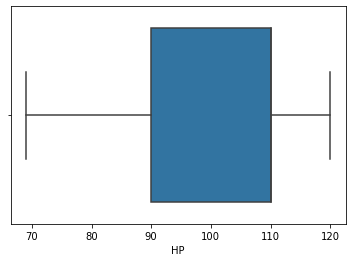

In [59]:
## Box plot of HP data---------After correcting Outliers 
sns.boxplot(x=df['HP'])
plt.savefig('Box plot new HP.jpg')

Outliers have been removed from the HP data

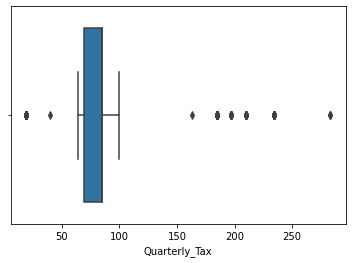

In [60]:
## Box plot of Quarterly_Tax data---------to check the presence of outliers
sns.boxplot(x=df['Quarterly_Tax'])
plt.savefig('Box plot Quarterly_Tax.jpg')

In [61]:
## Adjust/Remove the Outlier present in Quarterly_Tax coloumn
Q1 = df['Quarterly_Tax'].quantile(0.25)
print('The value of Q1 is: ', Q1)
Q3 = df['Quarterly_Tax'].quantile(0.75)
print('The value of Q3 is: ', Q3)

The value of Q1 is:  69.0
The value of Q3 is:  85.0


In [62]:
IQR=Q3-Q1
print('The value of IQR is: ', IQR)
upper_thres = Q1 + (1.5*IQR)
print('The value of upper threshld is :',round(upper_thres,2))

The value of IQR is:  16.0
The value of upper threshld is : 93.0


In [63]:
df[df['Quarterly_Tax']>upper_thres]

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500.0,23.0,10,2002,46986.0,Diesel,90.0,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13700.0,23.0,10,2002,72937.0,Diesel,90.0,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13700.0,24.0,9,2002,41711.0,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13700.0,26.0,7,2002,48000.0,Diesel,90.0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13700.0,30.0,3,2002,38500.0,Diesel,90.0,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1202,TOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-...,8750.0,74.0,7,1998,89800.0,Diesel,72.0,1,...,0,0,1,1,0,0,1,0,1,0
1202,1209,TOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-...,6950.0,73.0,8,1998,88186.0,Diesel,72.0,1,...,0,0,1,0,0,0,1,0,0,0
1216,1223,TOYOTA Corolla 2.0 DSL LIFTB LINEA TERRA 4/5-D...,8500.0,70.0,11,1998,85864.0,Diesel,72.0,1,...,1,1,1,0,0,1,1,0,0,1
1320,1327,TOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-...,9400.0,69.0,12,1998,67092.0,Diesel,72.0,1,...,1,1,1,0,0,1,1,0,0,0


In [64]:
## Will Change the row in order to avoid outlier
df['Quarterly_Tax'] = np.where(df['Quarterly_Tax']>upper_thres,upper_thres,df['Quarterly_Tax']) 

<AxesSubplot:xlabel='Quarterly_Tax'>

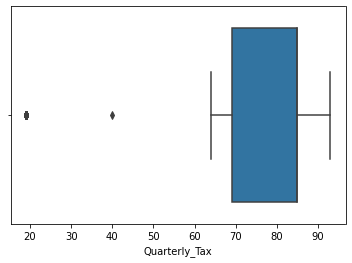

In [65]:
## Box plot of Quaterly_tax data---------After correcting Outliers 
sns.boxplot(x=df['Quarterly_Tax'])
#plt.savefig('Box plot R&D spend.jpg')

Outliers on the right side have been removed, there are few on the right side

In [66]:
IQR=Q3-Q1
print('The value of IQR is: ', IQR)
lower_thres = Q1 - (1.5*IQR)
print('The value of upper threshld is :',round(lower_thres,2))

The value of IQR is:  16.0
The value of upper threshld is : 45.0


In [67]:
df[df['Quarterly_Tax']<lower_thres]

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
18,19,TOYOTA Corolla 1.6 16v L.SOL 2/3-Doors,13700.0,24.0,9,2002,25563.0,Petrol,110.0,0,...,1,1,1,0,1,0,0,0,0,0
30,31,TOYOTA Corolla 1.4 VVTI Linea Terra 2/3-Doors,12950.0,29.0,4,2002,9750.0,Petrol,97.0,1,...,0,0,1,1,0,0,0,0,1,0
65,66,TOYOTA Corolla 1.6 VVT-I 5DR LINEA SOL 4/5-Doors,13700.0,26.0,7,2002,32181.0,Petrol,110.0,1,...,1,1,1,0,1,0,0,0,0,0
126,128,TOYOTA Corolla 1.6 VVT-i Linea Sol 4/5-Doors,13700.0,20.0,1,2003,36000.0,Petrol,110.0,1,...,1,1,1,1,0,0,0,1,1,1
129,131,TOYOTA Corolla 1.6 vvt-i nw model comfort airc...,13700.0,13.0,8,2003,33477.0,Petrol,110.0,1,...,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1394,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,7450.0,78.0,3,1998,52287.0,Petrol,110.0,0,...,1,1,1,0,0,0,0,0,0,0
1388,1395,TOYOTA Corolla 1.6 LL HB 4/5-Doors,8750.0,75.0,6,1998,52000.0,Petrol,110.0,0,...,1,1,1,1,0,0,0,0,1,0
1416,1423,TOYOTA Corolla 1.6 LB 4/5-Doors,8950.0,79.0,2,1998,40093.0,Petrol,110.0,0,...,1,0,1,1,0,0,0,0,1,0
1423,1430,TOYOTA Corolla 1.3 HB LINEA TERRA AUT 2/3-Doors,7950.0,80.0,1,1998,35821.0,Petrol,86.0,0,...,0,0,1,0,0,0,0,0,0,0


In [68]:
df['Quarterly_Tax']=np.where(df['Quarterly_Tax']<lower_thres,lower_thres,df['Quarterly_Tax'])

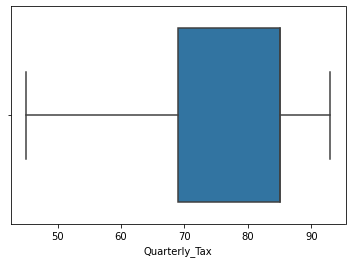

In [69]:
## Box plot of Quaterly_tax data---------After correcting Outliers 
sns.boxplot(x=df['Quarterly_Tax'])
plt.savefig('Box plot new Quarterly_Tax.jpg')

Encoding : Since the data has column as states which is a categorical independent column. This categorical feature should be converted to some integral values via one hot encoding method.


In [70]:
df.columns

Index(['Id', 'Model', 'Price', 'Age', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [71]:
df= df [['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']]
df.head()

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500.0,23.0,46986.0,90.0,1700.0,3,5,93.0,1107.5
1,13700.0,23.0,72937.0,90.0,1700.0,3,5,93.0,1107.5
2,13700.0,24.0,41711.0,90.0,1700.0,3,5,93.0,1107.5
3,13700.0,26.0,48000.0,90.0,1700.0,3,5,93.0,1107.5
4,13700.0,30.0,38500.0,90.0,1700.0,3,5,93.0,1107.5


### Model: Multiple Linear Regression

---------Sampling of data----------

In [72]:
df.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

In [149]:
x=df.iloc[:,1:]
y=df['Price']

In [53]:
df['Doors'].unique()

array([3, 5, 4, 2], dtype=int64)

In [54]:
df['Gears'].unique()

array([5, 6, 3, 4], dtype=int64)

In [76]:
# standardization of data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [77]:
x_sc=sc.fit_transform(x)

NameError: name 'x' is not defined

In [78]:
from sklearn.model_selection import train_test_split

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,train_size=0.8,random_state=1)

In [154]:
x_train.shape,x_test.shape

((1148, 8), (288, 8))

In [155]:
y_train.shape,y_test.shape

((1148,), (288,))

----------------Model Building--------------

In [156]:
from sklearn.linear_model import LinearRegression

In [157]:
model = LinearRegression()

In [158]:
model_fit = model.fit(x_train,y_train)

In [159]:
# Coefficient 
print('The coefficient of the fitted data is: ', model_fit.coef_)

The coefficient of the fitted data is:  [-1527.19280081  -414.28292827   342.99088995  -125.26825303
    31.188988      74.62357752   217.07220782   126.8900595 ]


In [160]:
# Intercept
print('The intercept of the fitted data is: ', model_fit.intercept_)

The intercept of the fitted data is:  10099.037704154318


------------Model Prediction--------------

In [161]:
pred=model_fit.predict(x_test)
pred

array([11241.71840648, 10512.84484704, 12534.53592458,  7800.62842618,
       11541.95974268, 12824.84440626,  8340.6798188 ,  9831.57306255,
        7536.9922326 , 10280.17404052,  9547.10907835,  9508.70761669,
        8057.8869134 ,  9121.03505675,  7483.57592558,  8692.17284462,
        7196.24212652,  7718.3445381 , 14353.92485592,  7479.02990691,
       13860.22152743,  7794.26310247,  9325.43338607,  7900.1063966 ,
       12085.7047799 , 13420.63373029,  8448.92769375, 10175.08861564,
       13860.73571671,  9455.48935826,  8243.60823261,  8147.29637342,
       12053.98691196, 14326.34213361, 15932.16165197, 10023.37532243,
       10367.97750467,  8306.97344714,  9244.39824869, 14023.61728247,
       11246.65673853,  8976.17957658,  8772.54170064, 10178.37402143,
        8558.68778503,  9831.59120882, 10441.8097294 ,  9396.13369869,
        7409.9630117 ,  7700.97067111,  7619.27612068, 10171.97636276,
        9221.42792281,  7636.27121485,  8705.75119508, 15119.29103589,
      

In [162]:
dd=pd.DataFrame(pred,columns=['predicted'])


In [163]:
dd['Actual']=y_test.values

In [164]:
dd

,predicted,Actual
0,11241.718406,10900.0
1,10512.844847,10895.0
2,12534.535925,10750.0
3,7800.628426,6500.0
4,11541.959743,11895.0
...,...,...
283,8625.680364,8750.0
284,12193.993475,10950.0
285,14031.024590,13700.0
286,8685.808723,8995.0


-------------Error Calculation---------------

In [165]:
# R square value, MSE, RMSE, MAE
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score
from math import sqrt

print('Model: Linear Regression')
print('The strength of the model is:',round((r2_score(dd['Actual'],dd['predicted'])),3))
print('The mean squared error value of the model is :',round((mean_squared_error(dd['Actual'],dd['predicted'])),3))
print('The mean absolute error value of the model is :',round((mean_absolute_error(dd['Actual'],dd['predicted'])),3))
RMSE= sqrt(mean_squared_error(dd['Actual'],dd['predicted']))
print('The root mean square value of the model is :',round(RMSE,3))


Model: Linear Regression
The strength of the model is: 0.773
The mean squared error value of the model is : 1201505.436
The mean absolute error value of the model is : 876.106
The root mean square value of the model is : 1096.132


1. The strength of the model is moderate since r square value lies between 0 and 1.
2. strongest when approaches 1 and weakest when approaches 0.
3. 0.773 value of r square implies a strong model, can be best fitted using other alogorithms

In [166]:
## accuracy_score

### Model: Ridge or L2 Regression

In [167]:
from sklearn.linear_model import Ridge
model_R = Ridge()

In [168]:
model_R_fit = model_R.fit(x_train,y_train)
pred_R = model_R_fit.predict(x_test)
pred_R

array([11240.58218792, 10511.93547806, 12533.10834968,  7803.06314872,
       11540.91228528, 12822.21632964,  8342.14775252,  9831.68675607,
        7539.9888656 , 10280.27667434,  9548.35582388,  9505.85656111,
        8060.29788948,  9121.32328938,  7484.83409264,  8692.97227431,
        7197.32859742,  7720.89766417, 14351.70441758,  7478.49750339,
       13858.71151028,  7794.48714635,  9324.27800439,  7900.24362228,
       12083.94735282, 13418.87250355,  8449.14342171, 10175.10005937,
       13859.44188526,  9456.77159813,  8244.65281315,  8150.70292679,
       12051.77360472, 14324.63333948, 15928.89166634, 10025.08166761,
       10368.13595749,  8305.90096878,  9244.82807328, 14021.583885  ,
       11246.62800577,  8975.74043908,  8774.3377305 , 10177.32002574,
        8561.30137958,  9832.13831363, 10441.42892824,  9395.35063145,
        7411.36038954,  7701.91841306,  7622.15435015, 10171.18764957,
        9221.577294  ,  7638.32712339,  8706.88347877, 15116.20050987,
      

In [169]:
print('Model: Ridge')
print('The strength of the model is:',round((r2_score(pred_R,y_test)),3))
print('The mean squared error value of the model is :',round((mean_squared_error(pred_R,y_test)),3))
print('The mean absolute error value of the model is :',round((mean_absolute_error(pred_R,y_test)),3))
RMSE= sqrt(mean_squared_error(pred_R,y_test))
print('The root mean square value of the model is :',round(RMSE,3))

Model: Ridge
The strength of the model is: 0.718
The mean squared error value of the model is : 1201440.934
The mean absolute error value of the model is : 876.093
The root mean square value of the model is : 1096.103


1. The strength (0.718) obtained from the ridge model is slighlty less than multiple linear regression model.
2. This means the data is not over-fitted.


### Model: Lasso or L1 Regression

In [170]:
from sklearn.linear_model import Lasso
model_L = Lasso()

In [171]:
model_L_fit = model_L.fit(x_train,y_train)
pred_L = model_L_fit.predict(x_test)
pred_L

array([11237.8734627 , 10511.45407763, 12534.08420178,  7806.08365888,
       11538.30071084, 12827.65414449,  8342.24213457,  9836.44419905,
        7542.5406037 , 10287.04877909,  9550.17201711,  9509.10958964,
        8060.47748033,  9121.73613442,  7481.47221428,  8693.09137568,
        7192.00144665,  7723.78882941, 14346.20887281,  7478.92444834,
       13852.43989597,  7794.53876042,  9326.14359136,  7901.97496875,
       12087.42248747, 13423.92898227,  8449.55214173, 10176.65040125,
       13860.03282791,  9462.25245135,  8240.25829129,  8148.85754619,
       12057.42447109, 14322.8261071 , 15930.68312875, 10022.45526167,
       10369.68395298,  8307.16065345,  9243.00673374, 14014.88623139,
       11245.26148688,  8978.46372259,  8771.62082158, 10185.11536976,
        8557.23647505,  9830.88824257, 10439.88411737,  9390.55940825,
        7407.85884221,  7701.39915781,  7624.83543318, 10178.54321104,
        9224.00857375,  7636.97563888,  8711.32678309, 15114.88064742,
      

In [172]:
print('Model: Lasso')
print('The strength of the model is:',round((r2_score(pred_L,y_test)),3))
print('The mean squared error value of the model is :',round((mean_squared_error(pred_L,y_test)),3))
print('The mean absolute error value of the model is :',round((mean_absolute_error(pred_L,y_test)),3))
RMSE= sqrt(mean_squared_error(pred_L,y_test))
print('The root mean square value of the model is :',round(RMSE,3))

Model: Lasso
The strength of the model is: 0.718
The mean squared error value of the model is : 1200984.017
The mean absolute error value of the model is : 876.103
The root mean square value of the model is : 1095.894


1. The strength (0.713) obtained from the Lasso model is similar to that obtained using Ridge model and is slighlty less than multiple linear regression model..
2. Not much change in strength is observed

In [173]:
# Inferences

### Model: Polynomial Regression

In [183]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2, include_bias=True)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [184]:
model=LinearRegression()
model_fit_poly = model.fit(x_train_poly,y_train)
pred_poly=model_fit_poly.predict(x_test_poly)

In [185]:
print('Model: Polynoimial Rergession')
print('The strength of the model is:',round((r2_score(pred_poly,y_test)),3))
print('The mean squared error value of the model is :',round((mean_squared_error(pred_poly,y_test)),3))
print('The mean absolute error value of the model is :',round((mean_absolute_error(pred_poly,y_test)),3))
RMSE= sqrt(mean_squared_error(pred_poly,y_test))
print('The root mean square value of the model is :',round(RMSE,3))

Model: Polynoimial Rergession
The strength of the model is: 0.755
The mean squared error value of the model is : 1103775.155
The mean absolute error value of the model is : 795.538
The root mean square value of the model is : 1050.607


1. The strength (0.755) obtained from the Polynomial model is more than that obtained using Ridge and Lasso model.
2. It is almost similar to that obtained using multiple linear regression model.
2. Not much change in strength is observed.

-------------Saving the Model------------

In [73]:
import joblib

In [74]:
filename='ToyotoCorollo_prj4.sav'

In [75]:
joblib.dump(model_fit,filename)

NameError: name 'model_fit' is not defined